### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [667]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
from statsmodels.graphics.mosaicplot import mosaic



### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [21]:
df = pd.read_csv('data/coupons.csv')

In [23]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

<Axes: >

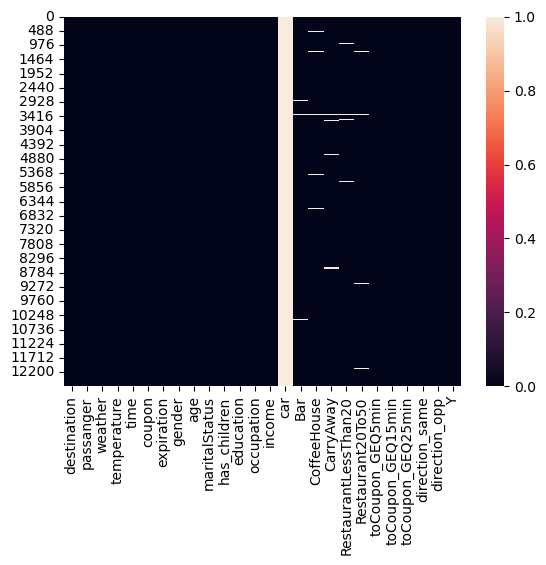

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

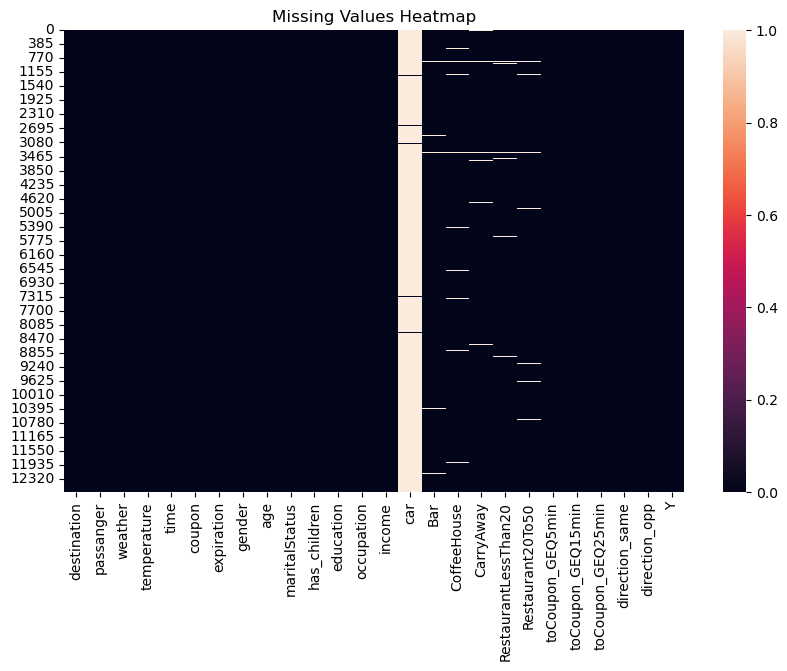

In [312]:
# Checking overall view of data
df.info()
df.describe()

# Going through columns and print distinct values
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Distinct values in column '{col}': {unique_values}")

##visualizing missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna())
plt.title("Missing Values Heatmap")

# Percent of missing data for each column
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False).round(2)
#missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data  = pd.DataFrame({"total": total,"percent" : percent})
print(missing_data)

#Finding duplicate rows
print(f"Total duplicate rows: {df.duplicated().sum()}")



3. Decide what to do about your missing data -- drop, replace, other...

In [319]:
#Dropping duplicate rows
df_final = df.drop_duplicates()
#Since car column is very sparse and doesn't seem very relevant to analysis, dropiing the column will be best choice here.
df_final  = df_final.drop(columns = ['car'])
#Other columns with mssing values are very low percentage, we will leave them unchanged for now.

4. What proportion of the total observations chose to accept the coupon?



In [91]:
value = df_final['Y'].mean() * 100
print(f"Proportion of the total observations chose to accept the coupon: {value.round(2)}%")

Proportion of the total observations chose to accept the coupon: 56.76%


5. Use a bar plot to visualize the `coupon` column.

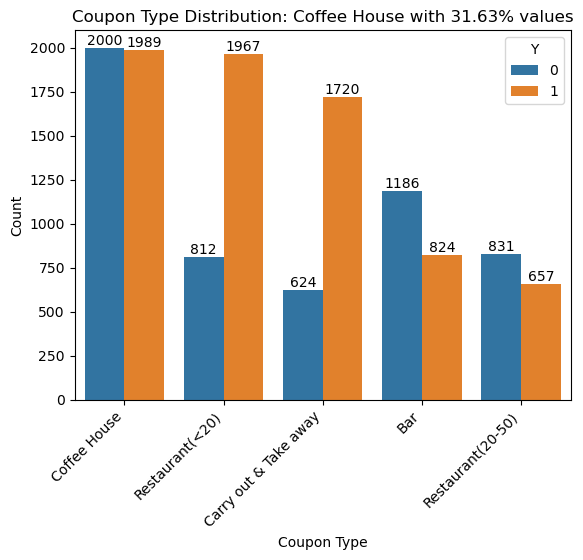

In [333]:
percent = pd.DataFrame((df_final['coupon'].value_counts()/df_final['coupon'].count()*100).sort_values(ascending=False).round(2)).reset_index()
#print(percent.iloc[0,0])
#counts.plot(kind='bar', title='Value Counts')
ax = sns.countplot(x='coupon', data=df_final, order=df_final['coupon'].value_counts().index,hue = 'Y')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.title(f"Coupon Type Distribution: {percent.iloc[0,0]} with {percent.iloc[0,1]}% values")
plt.xticks(rotation=45, ha='right')
plt.show()


6. Use a histogram to visualize the temperature column.

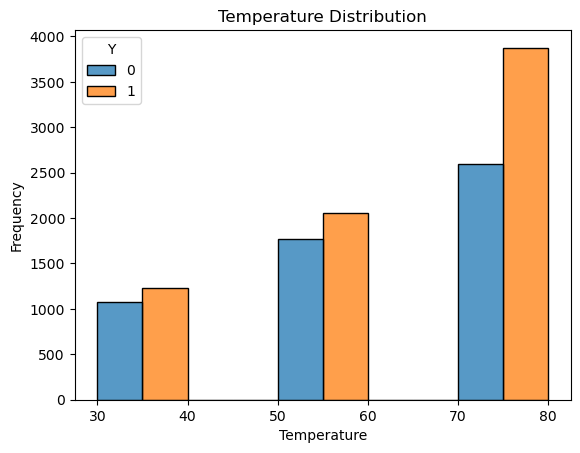

In [345]:
sns.histplot(df_final, x = 'temperature',binwidth =10,hue = 'Y', multiple = 'dodge')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [182]:
df_new = df_final[df_final['coupon']=='Bar']

(2010, 25)

2. What proportion of bar coupons were accepted?


In [184]:
bar_ratio = df_new['Y'].mean() * 100
print(f"Proportion of the bar coupons were accepted: {bar_ratio.round(2)}%")

Proportion of the bar coupons were accepted: 41.0%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [214]:
filter_less_3 = ['1~3','never','less1']
filter_gt_3  = ['gt8','4~8']
Rate_less_3 = (df_new[df_new['Bar'].isin(filter_less_3)]['Y'].mean()*100).round(2)
Rate_gt_3 = (df_new[df_new['Bar'].isin(filter_gt_3)]['Y'].mean()*100).round(2)
print(f'Acceptance rate for those who went to a bar 3 or fewer times a month: {Rate_less_3}% \nvs who visted more than thrice a month: {Rate_gt_3}%')

Acceptance rate for those who went to a bar 3 or fewer times a month: 37.04% 
vs who visted more than thrice a month: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [348]:
filter_gt_1 = ['1~3', 'gt8', '4~8']

condition4 = (df_new['Bar'].isin(filter_gt_1))&(~df_new['age'].isin(['below21','21']))
value4 = (df_new.groupby(condition4)[['Y']].mean()*100).round(2)

print(f'Acceptance rate for drivers with more than 1 per month and age greater than 25: {value4.loc[True,'Y']}% \n vs rest: {value4.loc[False,'Y']}%')


Acceptance rate for drivers with more than 1 per month and age greater than 25: 69.52% 
 vs rest: 33.46%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [354]:
filter_gt_1 = ['1~3', 'gt8', '4~8']
filter_not_kid = ['Friend(s)', 'Partner']  
condition5 = (df_new['Bar'].isin(filter_gt_1))&(df_new['passanger']).isin(filter_not_kid)&(~df_new['occupation'].isin(['Farming Fishing & Forestry']))
value5 = (df_new.groupby(condition5)[['Y']].mean()*100).round(2)

print(f'Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: {value5.loc[True,'Y']}% \n vs rest: {value5.loc[False,'Y']}%')


Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 71.79% 
 vs rest: 37.69%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [356]:
filter_gt_1 = ['1~3', 'gt8', '4~8']
filter_not_kid = ['Friend(s)', 'Partner'] 
Condition6_1 = (df_new['Bar'].isin(filter_gt_1))&(df_new['passanger'].isin(filter_not_kid))&(~df_new['maritalStatus'].isin(['Widowed']))
Condition6_2 = (df_new['Bar'].isin(filter_gt_1))&(df_new['age'].isin(['below21','21','26']))
Condition6_3 = (df_new['RestaurantLessThan20'].isin(['4~8','gt8']))&(df_new['income'].isin(['$12500 - $24999','$25000 - $37499','Less than $12500','$37500 - $49999']))
final_condition = Condition6_1 | Condition6_2|Condition6_3

Df_bar6_1 = (df_new.groupby(Condition6_1)[['Y']].mean() * 100).round(2)
Df_bar6_2 = (df_new.groupby(Condition6_2)[['Y']].mean() * 100).round(2)
Df_bar6_3 = (df_new.groupby(Condition6_3)[['Y']].mean() * 100).round(2)
print(f'Acceptance rate for bar more than once a month, no kid, not widow : {Df_bar6_1.loc[True,'Y']}%')
print(f'Acceptance rate for bar more than once a month, under 30 : {Df_bar6_2.loc[True,'Y']}%')
print(f'Acceptance rate for cheap restaurants and income less than $50K : {Df_bar6_3.loc[True,'Y']}%')


Acceptance rate for bar more than once a month, no kid, not widow : 71.79%
Acceptance rate for bar more than once a month, under 30 : 72.17%
Acceptance rate for cheap restaurants and income less than $50K : 45.35%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
	•	Bar coupon acceptance is lower than the overall average acceptance rate of 57%.
	•	Drivers who visit bars more than three times a month are significantly more likely to accept bar coupons.
	•	Even occasional bar-goers (at least once a month) show higher coupon acceptance rates than non-visitors.
	•	Drivers aged 25–30 demonstrate improved coupon acceptance.
	•	Not having children is positively correlated with higher coupon acceptance.
	•	Individuals in farming professions are more likely to accept coupons.
	•	Having a partner also contributes to a higher overall acceptance rate.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [669]:
#Calculate acceptance rate for each coupon groups
#pd.Series(df_final.columns)
df_coupons = ['Bar','Coffee House','Carry out & Take away','Restaurant(<20)','Restaurant(20-50)']
for coupon in df_coupons:
    df_new = ''
    df_new = df_final[df_final['coupon']== coupon]
    rate = (df_new['Y'].mean() * 100).round(2) 
    print(f"{coupon}_ratio = {rate}")

Bar_ratio = 41.0
Coffee House_ratio = 49.86
Carry out & Take away_ratio = 73.38
Restaurant(<20)_ratio = 70.78
Restaurant(20-50)_ratio = 44.15


In [671]:
#Since Carry out & Take away_ratio has highest acceptance rate, lets 
#look into other factors that can improve acceptance for this grop

In [672]:
df_carryout = df_final[df_final['coupon']== 'Carry out & Take away']

In [737]:
df_columns= ['weather','temperature','time','expiration',
'age','maritalStatus','occupation','passanger','gender','education','income']

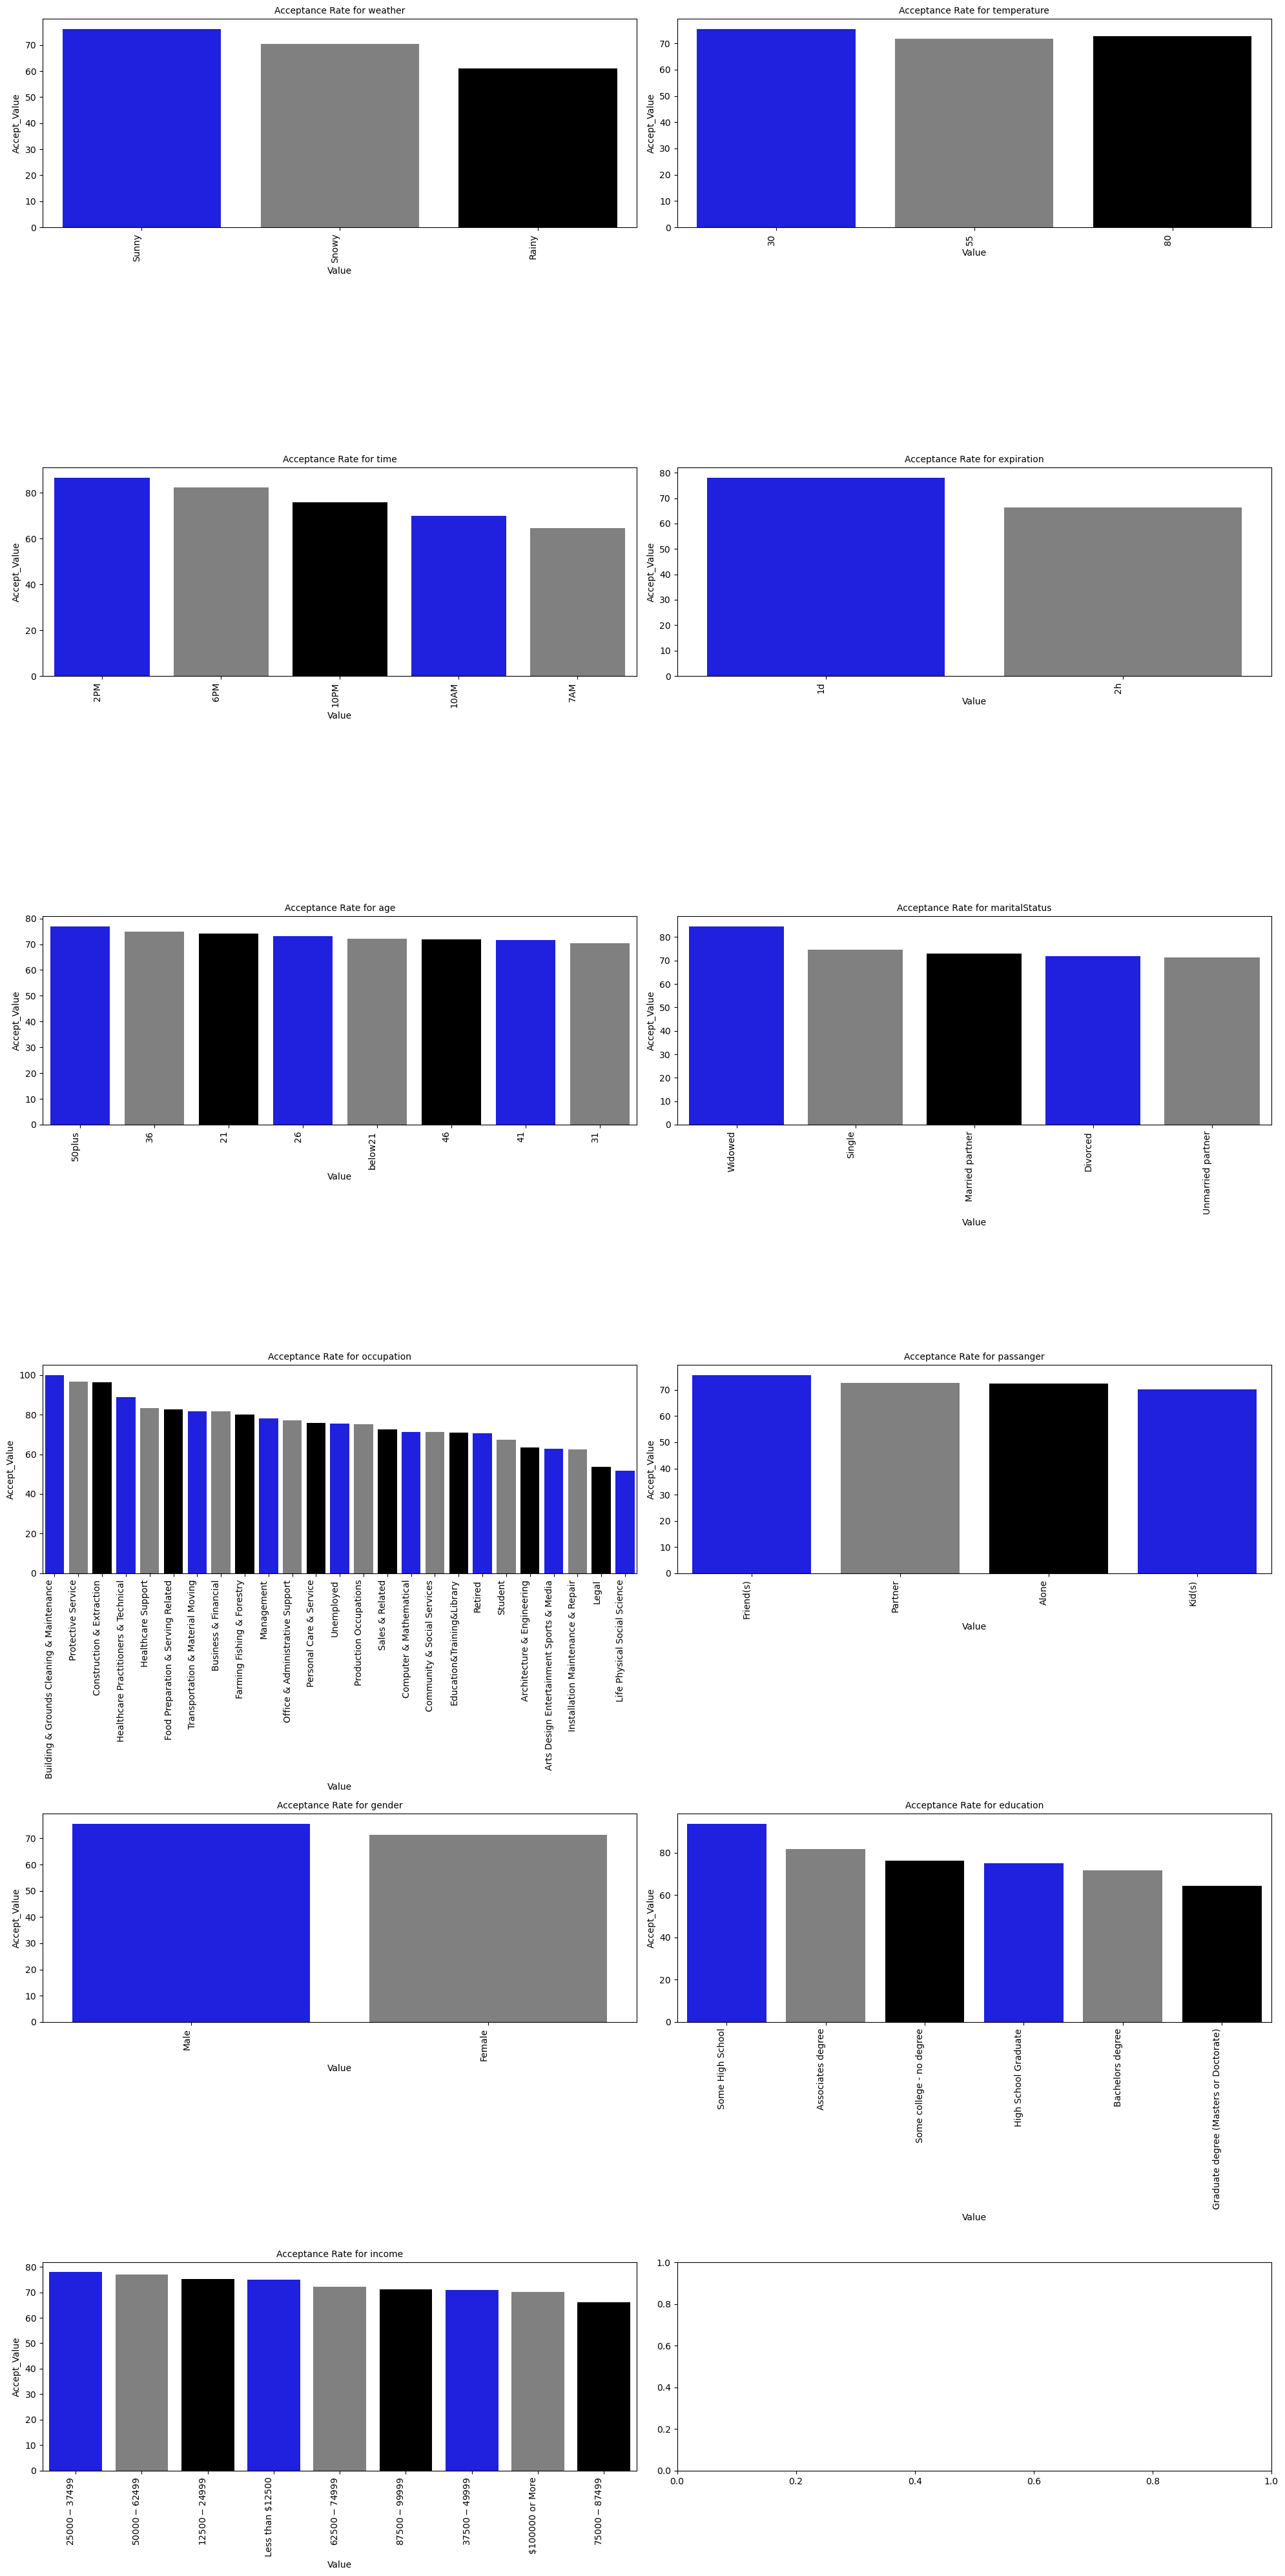

In [740]:
import math
import warnings
warnings.filterwarnings('ignore') # ignores all warnings
warnings.filterwarnings('ignore', category=DeprecationWarning) # ignores deprecation warnings
# Create subplots
fig, axes = plt.subplots(6, 2, figsize=(20,40))
x = 0
y = 0

for col in df_columns:
    accept_ratio = pd.DataFrame(columns = ['Value','Accept_Value'])
    col_cond = pd.Series(df_carryout[col].unique())
    col_cond.dropna()
    for cond in col_cond:
        condition = (df_carryout[col] == cond)
        value = (df_carryout.groupby(condition)[['Y']].mean()*100).round(2)
        #print(f"Acceptance rate for carryout and {col} = {cond} is {value.loc[True,'Y']}")
        temp = pd.DataFrame({'Value': [cond], 'Accept_Value': [value.loc[True,'Y']]})
        accept_ratio = pd.concat([accept_ratio, temp])
    #plt.figure(figsize=(16, 5))
    sns.barplot(x='Value', y='Accept_Value', data=accept_ratio.sort_values(by = 'Accept_Value', ascending=False), palette=sns.color_palette(['blue', 'gray', 'black']), ax=axes[y,x])
    #sns.countplot(x=col, data=df_carryout, hue ='Y') 
    axes[y,x].set_title(f'Acceptance Rate for {col}', fontsize=10)
    plt.sca(axes[y,x])
    plt.xticks(rotation=90, ha='right')   
    # Increment the plot location
    x += 1
    if x >= 2:
        x = 0
        y += 1
plt.tight_layout()
plt.show()    


        
    

In [ ]:
Since the Carry Out & Takeaway group has the highest acceptance rate, lets explore additional factors that could further enhance acceptance within this segment.
Observations:
	•	Carryout orders are more common during sunny weather.
	•	Usage increases around lunchtime, particularly around 2 PM.
	•	As the coupon expiration date approaches, redemption rates by drivers increase.
	•	Age does not appear to significantly impact carryout coupon usage; acceptance is evenly distributed across age groups.
	•	Widowed women redeem carryout coupons more frequently than individuals of other marital statuses.
	•	Men are more likely than women to use carryout coupons.
	•	Occupations such as Building & Grounds Maintenance, Protective Services, Health Care Support, and Construction & Extraction show higher acceptance rates for carryout coupons.
	•	High school graduates are more likely to use carryout coupons compared to individuals with other education levels.
	•	Drivers are more inclined to use carryout coupons when they have a friend as a passenger.
